In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from padelpy import from_smiles
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit import DataStructs
from padelpy import from_smiles, from_mdl, from_sdf

import numpy as np
import seaborn as sns
import matplotlib
pd.__version__

'1.3.5'

In [21]:
#Permitir imagens em linha
%matplotlib inline

In [22]:
#datafile = pd.read_csv("COVID-sulkowskalabtable.csv", names=['Smiles', 'BA'])
datafile = pd.read_csv("./screened/df_ready_classification.csv", delimiter= ",")
datafile.head(20)

,Unnamed: 0,HD,HA,logP,MW,lit,sum,Unnamed: 0.1,bioactivity_class,molecule_chembl_id,canonical_smiles,Peso Molecular,Número de Doadores de Hidrogênio,Número de Aceitadores de Hidrogênio,OWPC,pIC50
0,0,0,0,0,0,0,0,0,active,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,0.0,6.0,2.80320,6.124939
1,1,0,0,0,0,1,0,1,active,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,0.0,5.0,4.55460,7.000000
2,2,0,0,0,1,2,1,2,inactive,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,0.0,5.0,5.35740,4.301030
3,3,0,0,0,0,3,0,3,active,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,0.0,5.0,4.70690,6.522879
4,4,0,0,0,0,4,0,4,active,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,0.0,6.0,3.09530,6.096910
5,6,0,0,0,0,6,0,6,active,CHEMBL130098,CSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N(C)C,296.783,0.0,5.0,2.85010,7.000000
6,7,0,0,0,0,7,0,7,inactive,CHEMBL337486,CCCCCCSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N1CCOCC1,408.955,0.0,6.0,4.57120,4.301030
7,8,0,0,0,0,8,0,8,active,CHEMBL336538,COc1ccc(-c2nc(SC)n(C(=O)N(C)C)n2)cc1,292.364,0.0,6.0,2.20530,6.096910
8,9,0,0,0,0,9,0,9,inactive,CHEMBL131051,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)c1ccccc1,408.405,0.0,6.0,4.67010,4.301030
9,10,0,0,0,0,10,0,10,inactive,CHEMBL341437,CCSc1nc(-c2ccc(OC)cc2)nn1C(=O)N1CCOCC1,348.428,0.0,7.0,2.36600,4.301030


In [10]:
datafile.rename(columns={'canonical_smiles': 'SMILES'})

,Unnamed: 0,HD,HA,logP,MW,lit,sum,Unnamed: 0.1,bioactivity_class,molecule_chembl_id,SMILES,Peso Molecular,Número de Doadores de Hidrogênio,Número de Aceitadores de Hidrogênio,OWPC,pIC50
0,0,0,0,0,0,0,0,0,active,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,0.0,6.0,2.8032,6.124939
1,1,0,0,0,0,1,0,1,active,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,0.0,5.0,4.5546,7.000000
2,2,0,0,0,1,2,1,2,inactive,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,0.0,5.0,5.3574,4.301030
3,3,0,0,0,0,3,0,3,active,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,0.0,5.0,4.7069,6.522879
4,4,0,0,0,0,4,0,4,active,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,0.0,6.0,3.0953,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4824,6380,0,0,0,1,7478,1,7542,active,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,352.478,1.0,3.0,5.0610,9.679854
4825,6381,0,0,0,0,7479,0,7543,inactive,CHEMBL147527,C#CCN(C)C(C)Cc1cccc(OC(=O)N(C)CC)c1,287.246,1.0,4.0,2.1994,3.630784
4826,6382,0,0,0,0,7480,0,7544,active,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,311.337,1.0,4.0,3.1837,6.562249
4827,6383,0,0,0,0,7481,0,7545,inactive,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,198.269,1.0,2.0,2.6958,4.118045


In [11]:
#Encontre quantas linhas
len(datafile.index)

4829

# Converter a string SMILES em um objeto molecular RDKit

### Podemos ver os diferentes tipos de dados no dataframe

In [12]:
print(datafile.columns.tolist())

['Unnamed: 0', 'HD', 'HA', 'logP', 'MW', 'lit', 'sum', 'Unnamed: 0.1', 'bioactivity_class', 'molecule_chembl_id', 'canonical_smiles', 'Peso Molecular', 'Número de Doadores de Hidrogênio', 'Número de Aceitadores de Hidrogênio', 'OWPC', 'pIC50']


##### No momento em que as estruturas das moléculas são representadas por uma string SMILES, podemos converter a string SMILES em um objeto molecular RDKit e então exibir

## Adicionando estruturas ao dataframe do pandas

#### Agora podemos converter a string SMILES em um objeto molecular RDKit para cada linha no dataframe

In [13]:
PandasTools.AddMoleculeColumnToFrame(datafile,'canonical_smiles','Molecule',includeFingerprints=True)
>>> print([str(x) for x in  datafile.columns])

['Unnamed: 0', 'HD', 'HA', 'logP', 'MW', 'lit', 'sum', 'Unnamed: 0.1', 'bioactivity_class', 'molecule_chembl_id', 'canonical_smiles', 'Peso Molecular', 'Número de Doadores de Hidrogênio', 'Número de Aceitadores de Hidrogênio', 'OWPC', 'pIC50', 'Molecule']


In [14]:
mol = [Chem.MolFromSmiles(smi) for smi in datafile['canonical_smiles'].array.shift().dropna()]

with open("mol.mdl", "w") as output:
    output.write(str(mol))

In [15]:
datafile.dtypes

Unnamed: 0                               int64
HD                                       int64
HA                                       int64
logP                                     int64
MW                                       int64
lit                                      int64
sum                                      int64
Unnamed: 0.1                             int64
bioactivity_class                       object
molecule_chembl_id                      object
canonical_smiles                        object
Peso Molecular                         float64
Número de Doadores de Hidrogênio       float64
Número de Aceitadores de Hidrogênio    float64
OWPC                                   float64
pIC50                                  float64
Molecule                                object
dtype: object

##### Se visualizarmos o dataframe, o objeto molécula foi adicionado à última coluna. Seria melhor se a estrutura fosse mais facilmente visível. Então, alteramos a ordem das colunas.

In [16]:
#exibe o valor atual
cols = list(datafile.columns.values)
cols

['Unnamed: 0',
 'HD',
 'HA',
 'logP',
 'MW',
 'lit',
 'sum',
 'Unnamed: 0.1',
 'bioactivity_class',
 'molecule_chembl_id',
 'canonical_smiles',
 'Peso Molecular',
 'Número de Doadores de Hidrogênio',
 'Número de Aceitadores de Hidrogênio',
 'OWPC',
 'pIC50',
 'Molecule']

In [17]:
#alterar a ordem das colunas
datafile = datafile[['Molecule','SMILES','bioactivity_class']]

KeyError: "['SMILES'] not in index"

In [18]:
datafile.head(3)

,Unnamed: 0,HD,HA,logP,MW,lit,sum,Unnamed: 0.1,bioactivity_class,molecule_chembl_id,canonical_smiles,Peso Molecular,Número de Doadores de Hidrogênio,Número de Aceitadores de Hidrogênio,OWPC,pIC50,Molecule
0,0,0,0,0,0,0,0,0,active,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,0.0,6.0,2.8032,6.124939,<rdkit.Chem.rdchem.Mol object at 0x7f500497e750>
1,1,0,0,0,0,1,0,1,active,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,0.0,5.0,4.5546,7.000000,<rdkit.Chem.rdchem.Mol object at 0x7f5004a46e10>
2,2,0,0,0,1,2,1,2,inactive,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,0.0,5.0,5.3574,4.301030,<rdkit.Chem.rdchem.Mol object at 0x7f5004a469f0>


# Convertendo SMILES em .sdf

In [19]:
PandasTools.WriteSDF(datafile, './formats/df_ready_classification.sdf', molColName='Molecule', properties=list(datafile.columns))

# Calculation of molecular similarities

In [17]:
fplist = [] #fplist
for mol in datafile['Molecule']:
    fp = Chem.GetMorganFingerprintAsBitVect( mol,2 )
    fplist.append(fp)

In [18]:
datafile['mfp2']=fplist

In [19]:
datafile.head(3)

,Unnamed: 0,HD,HA,logP,MW,lit,sum,Unnamed: 0.1,bioactivity_class,molecule_chembl_id,canonical_smiles,Peso Molecular,Número de Doadores de Hidrogênio,Número de Aceitadores de Hidrogênio,OWPC,pIC50,Molecule,mfp2
0,0,0,0,0,0,0,0,0,active,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,0.0,6.0,2.8032,6.124939,<rdkit.Chem.rdchem.Mol object at 0x7efbf859e090>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,0,0,0,0,1,0,1,active,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,0.0,5.0,4.5546,7.000000,<rdkit.Chem.rdchem.Mol object at 0x7efbf859e150>,"[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,0,0,0,1,2,1,2,inactive,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,0.0,5.0,5.3574,4.301030,<rdkit.Chem.rdchem.Mol object at 0x7efbf859e210>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [20]:
fp1=datafile.at[0,'mfp2']

In [21]:
fp2=datafile.at[1,'mfp2']

In [22]:
DataStructs.DiceSimilarity(fp1,fp2)

0.17777777777777778

In [23]:
for r in datafile.index:
#r =0
    fp1 = datafile.at[r,'mfp2']
    colname = datafile.at[r,'Unnamed']
    simlist = [] #fplist
    for mol in datafile['Molecule']:
        fp = Chem.GetMorganFingerprintAsBitVect( mol,2 )
        sim =DataStructs.DiceSimilarity(fp1,fp)
        simlist.append(sim)
    datafile[colname]=simlist

KeyError: 'Unnamed'

In [24]:
datafile.head(3)

,Unnamed: 0,HD,HA,logP,MW,lit,sum,Unnamed: 0.1,bioactivity_class,molecule_chembl_id,canonical_smiles,Peso Molecular,Número de Doadores de Hidrogênio,Número de Aceitadores de Hidrogênio,OWPC,pIC50,Molecule,mfp2
0,0,0,0,0,0,0,0,0,active,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,0.0,6.0,2.8032,6.124939,<rdkit.Chem.rdchem.Mol object at 0x7efbf859e090>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,0,0,0,0,1,0,1,active,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,0.0,5.0,4.5546,7.000000,<rdkit.Chem.rdchem.Mol object at 0x7efbf859e150>,"[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,0,0,0,1,2,1,2,inactive,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,0.0,5.0,5.3574,4.301030,<rdkit.Chem.rdchem.Mol object at 0x7efbf859e210>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [65]:
newdatafile = datafile.drop(['mfp2','SMILES',"bioactivity_class"], axis=1)

KeyError: "['SMILES'] not found in axis"

,Molecule,ID,0,1,2,3,4,5,6,7,...,940,941,942,943,944,945,946,947,948,949
0,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",0,1.000000,0.333333,0.424242,0.236559,0.330097,0.250000,0.194175,0.380000,...,0.217391,0.188679,0.238532,0.147368,0.173913,0.217822,0.283019,0.264151,0.208333,0.227848
1,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",1,0.333333,1.000000,0.277228,0.252632,0.304762,0.228070,0.114286,0.352941,...,0.170213,0.203704,0.216216,0.247423,0.212766,0.252427,0.277778,0.314815,0.183673,0.148148
2,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",2,0.424242,0.277228,1.000000,0.255814,0.416667,0.266667,0.208333,0.365591,...,0.282353,0.202020,0.254902,0.159091,0.188235,0.297872,0.383838,0.282828,0.269663,0.138889
3,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",3,0.236559,0.252632,0.255814,1.000000,0.244444,0.424242,0.355556,0.321839,...,0.278481,0.193548,0.333333,0.243902,0.329114,0.363636,0.322581,0.258065,0.265060,0.181818
4,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",4,0.330097,0.304762,0.416667,0.244444,1.000000,0.275229,0.280000,0.350515,...,0.179775,0.155340,0.245283,0.347826,0.179775,0.265306,0.310680,0.233010,0.193548,0.157895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",945,0.217822,0.252427,0.297872,0.363636,0.265306,0.299065,0.265306,0.231579,...,0.229885,0.316832,0.307692,0.244444,0.298851,1.000000,0.336634,0.336634,0.329670,0.189189
946,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",946,0.283019,0.277778,0.383838,0.322581,0.310680,0.321429,0.174757,0.320000,...,0.239130,0.226415,0.311927,0.189474,0.260870,0.336634,1.000000,0.264151,0.250000,0.151899
947,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",947,0.264151,0.314815,0.282828,0.258065,0.233010,0.375000,0.213592,0.240000,...,0.173913,0.339623,0.220183,0.273684,0.173913,0.336634,0.264151,1.000000,0.208333,0.101266
948,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",948,0.208333,0.183673,0.269663,0.265060,0.193548,0.313725,0.344086,0.244444,...,0.560976,0.229167,0.262626,0.188235,0.268293,0.329670,0.250000,0.208333,1.000000,0.173913

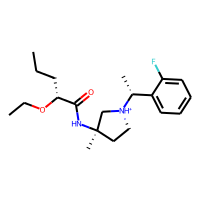
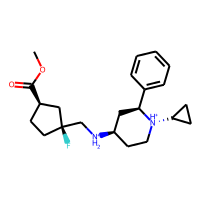
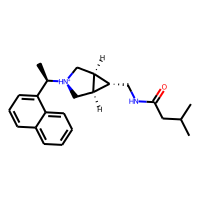
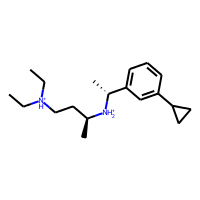
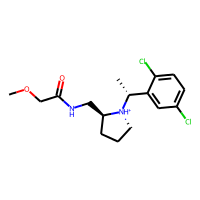
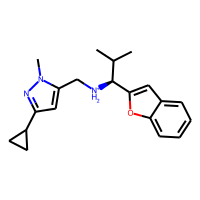
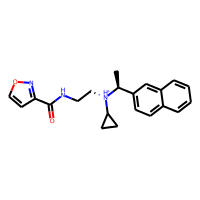
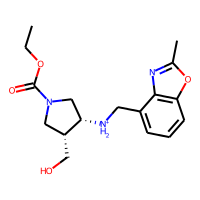
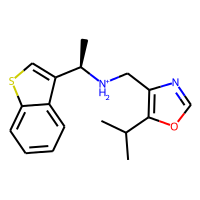
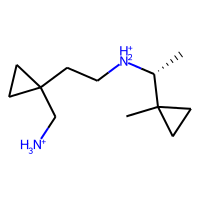

In [35]:
newdatafile

###### Também podemos usar a coloração contextual no dataframe, neste caso vamos destacar as pontuações de similaridade, mas pode ser usado para destacar afinidade, IC50 ou uma propriedade calculada como LogP.

In [25]:
import seaborn as sns

cm = sns.light_palette("red", as_cmap=True)
s = newdatafile.style.background_gradient(cmap=cm)
s

NameError: name 'newdatafile' is not defined